# U.S. Medical Insurance Costs 

## Overview:

We are given a dataset, `insurance.csv`, that consists of the following information for each patient:

* Age
* Sex
* BMI
* Number of Children
* Smoker/Non-Smoker
* Region
* Insurance Charges

## Project Goals:

For this project, we are going to examine the data and answer the following questions:

1. What is the average age of the patients in the dataset?
2. Where are the majority of the patients from?
3. What is the average age of someone with at least one child?
4. What is the difference in costs between females and males with no children?
5. Does the region where the person is located affect insurance costs?


First, let's import and read the data and make any modifications (if necessary):

In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')

# modify any columns for readability:

# renamed columns
data.columns = ['Age', 'Sex', 'BMI', 'Num Children', 'Smoker', 'Region', 'Charges (USD $)']

# rounded the values in the Charges column to match generic USD $ format
data['Charges (USD $)'] = data['Charges (USD $)'].round(2)

# used .title() to captalize the first letter for each region name
data['Region'] = data['Region'].apply(lambda x: x.title())

# display the first 5 rows of the dataset
data.head()

,Age,Sex,BMI,Num Children,Smoker,Region,Charges (USD $)
0,19,female,27.900,0,yes,Southwest,16884.92
1,18,male,33.770,1,no,Southeast,1725.55
2,28,male,33.000,3,no,Southeast,4449.46
3,33,male,22.705,0,no,Northwest,21984.47
4,32,male,28.880,0,no,Northwest,3866.86


#### Question 1: What is the average age of the patients in the dataset?
We will need to access the 'Age' column in the dataframe and use .mean() to find the average of all the values in that column.

In [26]:
average_age = data['Age'].mean()
print(f"The average age of the patients in the dataset is {int(average_age)}")

The average age of the patients in the dataset is 39


* We find that the average age of the patients is **39**.

* If we want to see the distribution of the patients ages, we can plot a histogram that will visually display that data.

* We'll use python libraries matplotlib and seaborn.

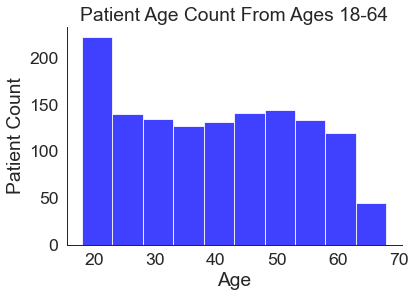

In [29]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# find the min and max age (for title of plot)
age_min = data['Age'].min()
age_max = data['Age'].max()

# plot data using seaborn's .hisplot() 
sns.set_palette('pastel')
sns.histplot(data=data, x=data['Age'], binwidth=5, color='#0000ff')
plt.ylabel('Patient Count')
plt.title('Patient Age Count From Ages ' + str(age_min) + '-' + str(age_max))
sns.despine()
plt.show()

We can see from this histogram that the majority of the patients ages are closely distributed between the early 20's and early 60's. 

#### Question 2: Where are the majority of the patients from?
To approach this task, we will need to count the number of patients in each region specified in the `Region`column of the dataframe.

For readability, we will add a `Count` column to represent one patient.

In [31]:
# create Count column
data['Count'] = 1

# group data by 'Region' and 'Count' and use .count() to find the number of patients in each region
region = data.groupby('Region')['Count'].count().reset_index()
region

,Region,Count
0,Northeast,324
1,Northwest,325
2,Southeast,364
3,Southwest,325


According to the table above, the **Southeast** region is where the majority of the patients are from with a total of **364** patients.

To visually display this data, we can create a pie chart using `Matplotlib`

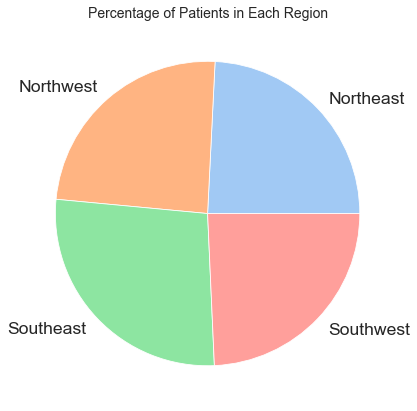

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

ax = plt.pie(region['Count'], labels=region['Region'])
plt.title('Percentage of Patients in Each Region',fontsize = 14)
plt.show()

#### Question 3: What is the average age of someone with at least one child?
What we can do here is group the `Num Children` and `Age` column and use `pandas .mean()` function to find the average age for someone with *x* number of children


In [43]:
num_children = data.groupby('Num Children')['Age'].mean().round(0).reset_index()
num_children

,Num Children,Age
0,0,38.0
1,1,39.0
2,2,39.0
3,3,42.0
4,4,39.0
5,5,36.0


According the data in the table, the average age for someone with at least one child is **39 years old**

If we want to play around with this information more:

* Let's find the difference in insurance charges between the youngest patient with 5 children and the oldest patient with no children
* **Hypothesis**: The difference in insurance charges are similar

In [136]:
# create dataframe with the following conditions
five_children = data[data['Num Children'] == 5].reset_index()
no_children = data[data['Num Children'] == 0 ].reset_index()

# Uncomment to see tables
# print(five_children)

# find the youngest with five children and the oldest with no children
young_five = five_children['Age'].min()
old_none = no_children['Age'].max()

print(f"The youngest with five children is {young_five} years old and the oldest with no children is {old_none} years old.")

The youngest with five children is 19 years old and the oldest with no children is 64 years old.


Now, let's compare the insurance charges between the two

In [137]:
young_five_ins = five_children[five_children['Age'] == young_five]
old_none_ins = no_children[no_children['Age'] == old_none]

# Uncomment to see tables:
# print(young_five_ins)
# print(old_none_ins)

# count how many patients there are 
print(f"Number of patients that's the youngest and has 5 children: {young_five_ins.Count.count()}")
print(f"Number of patients that's the oldest and has 0 children: {old_none_ins.Count.count()}")

Number of patients that's the youngest and has 5 children: 1
Number of patients that's the oldest and has 0 children: 13


We see from the data that (luckily), there's only one patient in the dataset that's the youngest with 5 children. 

However, there are 13 different patients who are the oldest and also have no children. We could just take the average of the insurance charges for all the data, but we see that the one patient with five children is female and a non-smoker. 

In that case, we will compare the average insurance charges of just the women who are non-smokers:


In [108]:
# find the average cost for females in the "oldest with no children" group
female_older = old_none_ins[old_none_ins['Smoker'] == 'no']
average = female_older.groupby('Sex')['Charges (USD $)'].mean().reset_index()
f_avg = average[average['Sex'] == 'female']
f_avg

,Sex,Charges (USD $)
0,female,14556.7675


In [106]:
# cost for "youngest with 5 children"
young_five_ins.iloc[0]['Charges (USD $)']

4687.8

In [113]:
# find the difference 
cost_diff = f_avg.iloc[0]['Charges (USD $)'] - young_five_ins.iloc[0]['Charges (USD $)']
print(f"The difference in insurance charges between the youngest non-smoker with 5 children and oldest non-smoker with no children: ${round(cost_diff,2)}")

The difference in insurance charges between the youngest non-smoker with 5 children and oldest non-smoker with no children: $9868.97


After finding the difference in insurance costs between the youngest patient with 5 children and the average of the oldest with no children, there's almost a \\$10,000 difference in charges. 
* As I stated in my hypothesis, I said that the charges would be similar, however, I was incorrect as a \\$10,000 difference is a large gap between the two

#### Question 4: What is the difference in costs between females and males with no children?
These are the steps we are going to take to approach this question:
* create a dataframe of just the patients with `0` children
* find the average costs between the men and women

We will also take into consideration if they are a smoker or not. We can then plot a bar chart to see the difference in average insurance costs between men and women with no kids and smokers/non-smokers.

In [6]:
# create dataframe of patients with no children 
data_no_children = data[data['Num Children'] == 0]
data_no_children.head()

,Age,Sex,BMI,Num Children,Smoker,Region,Charges (USD $)
0,19,female,27.900,0,yes,Southwest,16884.92
3,33,male,22.705,0,no,Northwest,21984.47
4,32,male,28.880,0,no,Northwest,3866.86
5,31,female,25.740,0,no,Southeast,3756.62
9,60,female,25.840,0,no,Northwest,28923.14


In [7]:
# find the average costs for the men and women and group by smokers/non-smokers
data_nc_avg = data_no_children.groupby(['Sex', 'Smoker'])['Charges (USD $)'].mean().reset_index()

# convert to a pivot table for readability
pivot_nc_data = data_nc_avg.pivot(columns = 'Smoker', 
                                 index = 'Sex', 
                                 values = 'Charges (USD $)')
pivot_nc_data

Smoker,no,yes
Sex,,
female,7688.318644,30685.059623
male,7530.806906,31902.398387


If we look at our table above, we'll see that female non-smokers on average have higher insurance costs, although not by much. In terms of the smokers, the males beat the females by roughly \\$1,000 more.

Below, we'll plot the data in the form of a bar chart. 

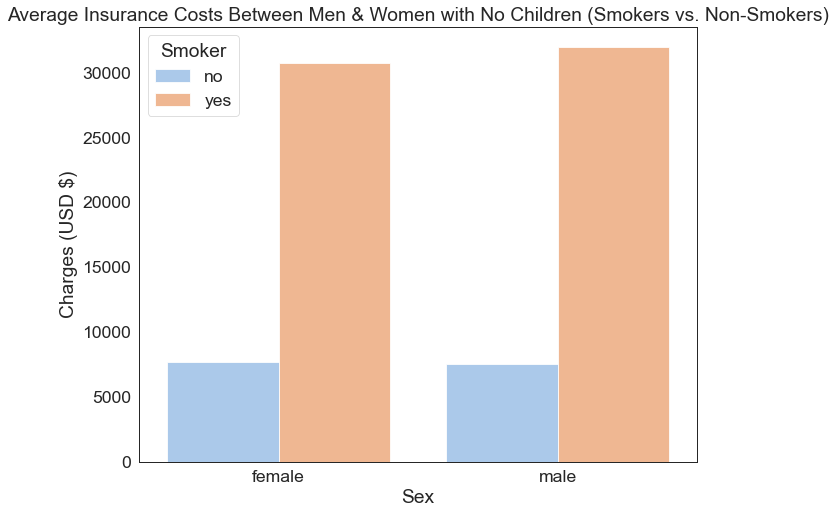

In [23]:
# create bar chart to show difference in average costs
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel')
sns.set_style('white')
sns.set_context('paper', font_scale=2)

f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='Sex', y='Charges (USD $)', hue='Smoker', data = data_nc_avg)
ax.set_title("Average Insurance Costs Between Men & Women with No Children (Smokers vs. Non-Smokers)")
plt.show()

There's one more factor we can consider and plot amongst the data we just found above. We will utilize catagorical scatter plot in seaborn called a swarmplot which will show us the effects a person's BMI has on their insurance costs.

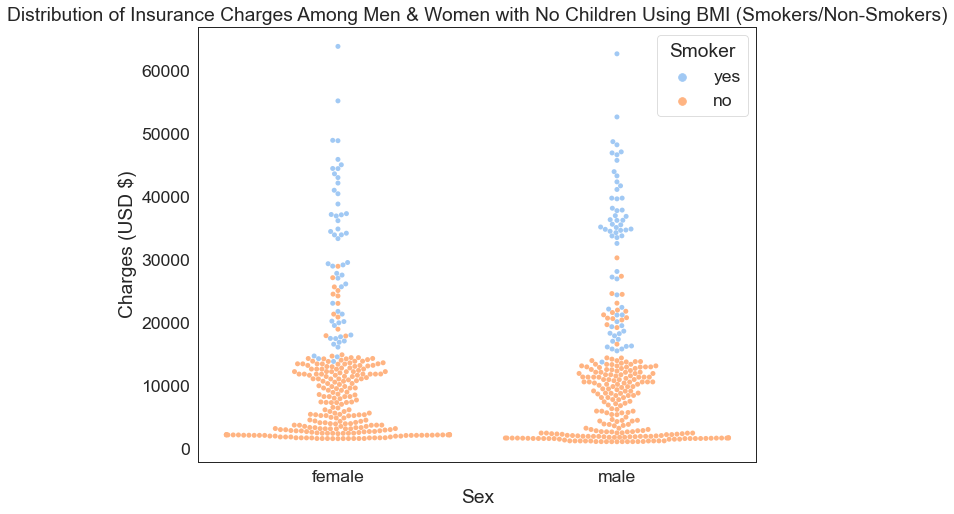

In [25]:
f2, ax2 = plt.subplots(figsize=(10,8))
ax2 = sns.swarmplot(x='Sex', y='Charges (USD $)', hue='Smoker', data=data_no_children)
ax2.set_title("Distribution of Insurance Charges Among Men & Women with No Children Using BMI (Smokers/Non-Smokers)")
plt.show()

Plot explanation:
* the **dots** represents BMI => the lower the BMI = lower insurance costs
    * since higher BMI's lead to higher risk for certain diseases, it is expected to see higher insurance charges associated with high BMI's

#### Question 5: Does the region where the person is located affect insurance costs?
To approach this question, we will find the average insurance cost in each region and compare the differences

If the difference between the locations aren't as spread out then we can conclude that the region a person lives in doesn't affect insurance charges.

In [144]:
location = data.groupby('Region')['Charges (USD $)'].mean().reset_index()
location

,Region,Charges (USD $)
0,Northeast,13406.384599
1,Northwest,12417.575169
2,Southeast,14735.411484
3,Southwest,12346.937508


We're going to plot the data so it'll be easier to see the differences in charges between the regions

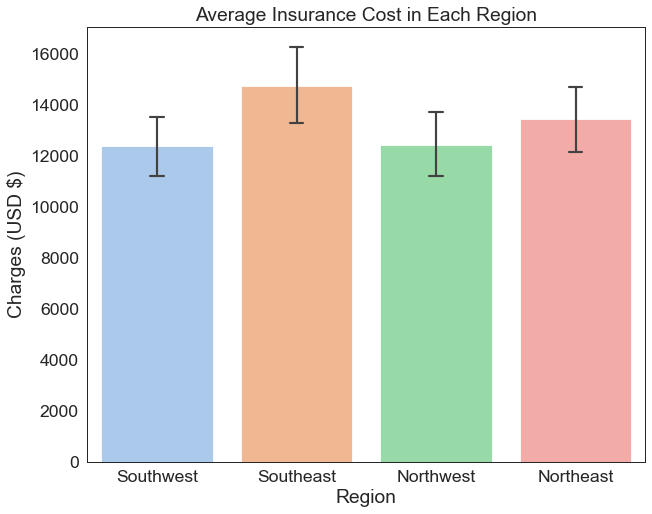

In [40]:
import matplotlib.pyplot as plt

f3, ax3 = plt.subplots(figsize=(10,8))
ax3 = sns.barplot(x='Region', y='Charges (USD $)', data = data, capsize = 0.1)
ax3.set_title('Average Insurance Cost in Each Region')
plt.show()

As we can see from the plot, the average insurance costs for each region are roughly within \\$12,000 to \\$15,000. It's expected that the Southeast region have the higher insurance cost average since we found in **Question 2** that the majority of the patients are from the Southeast.

## Conclusion

After examining the data, we see that:

* The average age of the patients was **39 years old**
* The majority of the patients are located in the **Southeast Region**
* The average age of someone with at least 1 child is **39 years old**
* An older person with no children has higher insurance costs compared to a younger person with multiple children
* For non-smokers, women on average have higher insurance charges while for smokers the men have higher charges
* The location of the patient has no effect on insurance charges